- You are working as an analyst for an auto insurance company. The company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. 
- You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

### Pipeline controller

In [2]:
#df=load_original_data(df) 
#df=lower_case_column_names(df)
#df=rename_columns(df)
#df=drop_columns(df)

## Activity 1

### Aggregate data into one Data Frame using Pandas

In [3]:
file1 = pd.read_csv('Data/file1.csv')
file1

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#file1["State"] = file1["ST"]
file1 = file1.rename(columns={"GENDER":"Gender"})
file1

,Customer,ST,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# percentage in costumer life value could give us problems, let's get rid of it

In [6]:
file1["Customer Lifetime Value"] = file1["Customer Lifetime Value"].astype("string")
file1["Customer Lifetime Value"] = file1["Customer Lifetime Value"].str.rstrip("%")

In [7]:
file2 = pd.read_csv('Data/file2.csv')
file2

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Total Claim Amount,Policy Type,Vehicle Class
0,GS98873,Arizona,F,Bachelor,323912.47%,16061,88,1/0/00,633.600000,Personal Auto,Four-Door Car
1,CW49887,California,F,Master,462680.11%,79487,114,1/0/00,547.200000,Special Auto,SUV
2,MY31220,California,F,College,899704.02%,54230,112,1/0/00,537.600000,Personal Auto,Two-Door Car
3,UH35128,Oregon,F,College,2580706.30%,71210,214,1/1/00,1027.200000,Personal Auto,Luxury Car
4,WH52799,Arizona,F,College,380812.21%,94903,94,1/0/00,451.200000,Corporate Auto,Two-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
991,HV85198,Arizona,M,Master,847141.75%,63513,70,1/0/00,185.667213,Personal Auto,Four-Door Car
992,BS91566,Arizona,F,College,543121.91%,58161,68,1/0/00,140.747286,Corporate Auto,Four-Door Car
993,IL40123,Nevada,F,College,568964.41%,83640,70,1/0/00,471.050488,Corporate Auto,Two-Door Car
994,MY32149,California,F,Master,368672.38%,0,96,1/0/00,28.460568,Personal Auto,Two-Door Car


In [8]:
file2 = file2.rename(columns={"GENDER":"Gender"})
file2

,Customer,ST,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Total Claim Amount,Policy Type,Vehicle Class
0,GS98873,Arizona,F,Bachelor,323912.47%,16061,88,1/0/00,633.600000,Personal Auto,Four-Door Car
1,CW49887,California,F,Master,462680.11%,79487,114,1/0/00,547.200000,Special Auto,SUV
2,MY31220,California,F,College,899704.02%,54230,112,1/0/00,537.600000,Personal Auto,Two-Door Car
3,UH35128,Oregon,F,College,2580706.30%,71210,214,1/1/00,1027.200000,Personal Auto,Luxury Car
4,WH52799,Arizona,F,College,380812.21%,94903,94,1/0/00,451.200000,Corporate Auto,Two-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
991,HV85198,Arizona,M,Master,847141.75%,63513,70,1/0/00,185.667213,Personal Auto,Four-Door Car
992,BS91566,Arizona,F,College,543121.91%,58161,68,1/0/00,140.747286,Corporate Auto,Four-Door Car
993,IL40123,Nevada,F,College,568964.41%,83640,70,1/0/00,471.050488,Corporate Auto,Two-Door Car
994,MY32149,California,F,Master,368672.38%,0,96,1/0/00,28.460568,Personal Auto,Two-Door Car


In [9]:
file2["Customer Lifetime Value"] = file2["Customer Lifetime Value"].astype("string")
file2["Customer Lifetime Value"] = file2["Customer Lifetime Value"].str.rstrip("%")
file2

,Customer,ST,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Total Claim Amount,Policy Type,Vehicle Class
0,GS98873,Arizona,F,Bachelor,323912.47,16061,88,1/0/00,633.600000,Personal Auto,Four-Door Car
1,CW49887,California,F,Master,462680.11,79487,114,1/0/00,547.200000,Special Auto,SUV
2,MY31220,California,F,College,899704.02,54230,112,1/0/00,537.600000,Personal Auto,Two-Door Car
3,UH35128,Oregon,F,College,2580706.30,71210,214,1/1/00,1027.200000,Personal Auto,Luxury Car
4,WH52799,Arizona,F,College,380812.21,94903,94,1/0/00,451.200000,Corporate Auto,Two-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
991,HV85198,Arizona,M,Master,847141.75,63513,70,1/0/00,185.667213,Personal Auto,Four-Door Car
992,BS91566,Arizona,F,College,543121.91,58161,68,1/0/00,140.747286,Corporate Auto,Four-Door Car
993,IL40123,Nevada,F,College,568964.41,83640,70,1/0/00,471.050488,Corporate Auto,Two-Door Car
994,MY32149,California,F,Master,368672.38,0,96,1/0/00,28.460568,Personal Auto,Two-Door Car


In [10]:
file3 = pd.read_csv('Data/file3.csv')
file3

,Customer,State,Customer Lifetime Value,Education,Gender,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


In [11]:
file3= file3.rename(columns={"State":"ST"})

In [12]:
def load_original_data():
    return pd.concat([file1,file2,file3], axis=0)

In [13]:
df = load_original_data()
df

,Customer,ST,Gender,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,<NA>,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23406,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.51,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.89,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.44,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


### Standardizing header names

In [14]:
def lower_case_column_names(df):
    df.columns=[i.lower() for i in df.columns]
    return df

In [15]:
lower_case_column_names(df)

,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,<NA>,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23406,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.51,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.89,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.44,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


### Deleting and rearranging columns

In [16]:
def drop_columns(df): 
    df.drop(["customer"], axis=1,inplace=True)
    return df

In [17]:
drop_columns(df)

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,<NA>,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23406,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3096.51,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8163.89,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7524.44,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [18]:
#df["customer lifetime value"] = df["customer lifetime value"].replace({'%',' '})
#NOT WORKING

In [19]:
#df["education"]  = df["education"].replace({'Master': 'M'})


### Working with data types

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12074 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   st                         9137 non-null   object 
 1   gender                     9015 non-null   object 
 2   education                  9137 non-null   object 
 3   customer lifetime value    9130 non-null   object 
 4   income                     9137 non-null   float64
 5   monthly premium auto       9137 non-null   float64
 6   number of open complaints  9137 non-null   object 
 7   policy type                9137 non-null   object 
 8   vehicle class              9137 non-null   object 
 9   total claim amount         9137 non-null   float64
dtypes: float64(3), object(7)
memory usage: 1.0+ MB


In [21]:
#df["customer lifetime value"] = df["customer lifetime value"].astype("string")

In [22]:
#df["customer lifetime value"] = df["customer lifetime value"].str.rstrip("%")

In [23]:
df["education"].unique()

array(['Master', 'Bachelor', 'High School or Below', 'College',
       'Bachelors', 'Doctor', nan], dtype=object)

In [24]:
sorted(df)

['customer lifetime value',
 'education',
 'gender',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'st',
 'total claim amount',
 'vehicle class']

In [25]:
#df["customer lifetime value"].mean()

In [26]:
df["customer lifetime value"].isnull().sum(axis = 0)

2944

### Clean the number of open complaints and extract the middle number which is changing between records. Pay attention that the number of open complaints is a categorical feature.

- To extract that number, should be a string. We are going to change it

In [27]:
df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,<NA>,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23406,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3096.51,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8163.89,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7524.44,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [28]:
df["number of open complaints"].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan, 0,
       2, 3, 1, 5, 4], dtype=object)

In [29]:
df["number of open complaints"] = df["number of open complaints"].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12074 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   st                         9137 non-null   object 
 1   gender                     9015 non-null   object 
 2   education                  9137 non-null   object 
 3   customer lifetime value    9130 non-null   object 
 4   income                     9137 non-null   float64
 5   monthly premium auto       9137 non-null   float64
 6   number of open complaints  9137 non-null   string 
 7   policy type                9137 non-null   object 
 8   vehicle class              9137 non-null   object 
 9   total claim amount         9137 non-null   float64
dtypes: float64(3), object(6), string(1)
memory usage: 1.0+ MB


In [30]:
#df["number of open complaints"] = df["number of open complaints"].str.strip("/")

#df["number of open complaints"] = df["number of open complaints"].str.rstrip("/00")

In [31]:
#(df["number of open complaints"].str.startswith("1/"))

- slice just first 3 characters and then just keep the last one

In [32]:
df["number of open complaints"] = df["number of open complaints"].str[:3].str[-1] 

In [33]:
df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,<NA>,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23406,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,3096.51,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,8163.89,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,7524.44,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [34]:
df["number of open complaints"].unique()

<StringArray>
['0', '2', '1', '3', '5', '4', <NA>]
Length: 7, dtype: string

In [35]:
df["number of open complaints"].value_counts()

0    7255
1    1012
2     376
3     290
4     148
5      56
Name: number of open complaints, dtype: Int64

### Filtering data and Correcting typos

- Filter the data in state and gender column to standardize the texts in those columns

In [36]:
df["gender"].value_counts()

F         4560
M         4368
Male        40
female      30
Femal       17
Name: gender, dtype: int64

In [37]:
def clean_gender(x):
    if x in ['M', 'MALE']:
        return 'Male'
    else:
        return 'Female'

In [38]:
df['gender'] = list(map(clean_gender, df['gender'])) 

In [39]:
#df["gender"] = df["gender"].replace({'Male': 'M', 'female': 'F', 'Femal': 'F'})
#df["gender"].value_counts()

In [40]:
df["st"].value_counts()

California    3032
Oregon        2601
Arizona       1630
Nevada         882
Washington     768
Cali           120
AZ              74
WA              30
Name: st, dtype: int64

In [41]:
df["st"] = df["st"].replace({'AZ': 'Arizona', 'WA': 'Washington','Cali': 'California'})
df["st"].value_counts()

California    3152
Oregon        2601
Arizona       1704
Nevada         882
Washington     798
Name: st, dtype: int64

In [42]:
df["education"].value_counts()

Bachelor                2719
College                 2682
High School or Below    2616
Master                   752
Doctor                   344
Bachelors                 24
Name: education, dtype: int64

In [43]:
df["policy type"].value_counts()

Personal Auto     6792
Corporate Auto    1965
Special Auto       380
Name: policy type, dtype: int64

In [44]:
df["vehicle class"].value_counts()

Four-Door Car    4641
Two-Door Car     1896
SUV              1774
Sports Car        483
Luxury SUV        182
Luxury Car        161
Name: vehicle class, dtype: int64

### Removing duplicates

In [45]:
df.duplicated().sum()

3198

In [46]:
df = df[~df.duplicated()]    #show df not in df duplicated
df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,Female,Master,<NA>,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,Arizona,Female,Bachelor,697953.59,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,Female,Bachelor,1288743.17,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,California,Male,Bachelor,764586.18,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,Washington,Male,High School or Below,536307.65,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,Male,Bachelor,23406,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,Female,College,3096.51,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,Male,Bachelor,8163.89,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,Male,College,7524.44,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


### Replacing null values

In [47]:
round(df.isna().sum()/len(df),4)*100  #show percentage of null values in a column

st                           0.01
gender                       0.00
education                    0.01
customer lifetime value      0.09
income                       0.01
monthly premium auto         0.01
number of open complaints    0.01
policy type                  0.01
vehicle class                0.01
total claim amount           0.01
dtype: float64

In [48]:
df["customer lifetime value"].value_counts()

26197.41498           6
9031.214859           6
5096.673223           6
5504.1390329999995    5
8622.835375           5
                     ..
19045.50012           1
9419.883665000001     1
21590.44235           1
1518227.98            1
863540.35             1
Name: customer lifetime value, Length: 8211, dtype: int64

In [49]:
df["customer lifetime value"].isna().sum()

8

- Correcting data types with to_numeric

In [50]:
#df["customer lifetime value"]= pd.to_numeric(df["customer lifetime value"])
#df['DataFrame Column'] = pd.to_numeric(df['DataFrame Column'],errors='coerce')

In [51]:
df["number of open complaints"]= pd.to_numeric(df["number of open complaints"],errors='coerce')
#with coerce, invalid parsing will be set as NaN.

<ipython-input-51-4f7b8f2ecb71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["number of open complaints"]= pd.to_numeric(df["number of open complaints"],errors='coerce')


In [52]:
df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,Female,Master,<NA>,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,Female,Bachelor,697953.59,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,Female,Bachelor,1288743.17,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,Male,Bachelor,764586.18,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,Male,High School or Below,536307.65,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,Male,Bachelor,23406,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
7066,California,Female,College,3096.51,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
7067,California,Male,Bachelor,8163.89,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
7068,California,Male,College,7524.44,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8876 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   st                         8875 non-null   object 
 1   gender                     8876 non-null   object 
 2   education                  8875 non-null   object 
 3   customer lifetime value    8868 non-null   object 
 4   income                     8875 non-null   float64
 5   monthly premium auto       8875 non-null   float64
 6   number of open complaints  8875 non-null   float64
 7   policy type                8875 non-null   object 
 8   vehicle class              8875 non-null   object 
 9   total claim amount         8875 non-null   float64
dtypes: float64(4), object(6)
memory usage: 762.8+ KB


In [54]:
#df["customer lifetime value"].mean()

In [55]:
#round_mean = round(df["customer lifetime value"].mean(),2)
#round_mean

### Replace missing values with means of the column

In [56]:
df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,Female,Master,<NA>,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,Female,Bachelor,697953.59,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,Female,Bachelor,1288743.17,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,Male,Bachelor,764586.18,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,Male,High School or Below,536307.65,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,Male,Bachelor,23406,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
7066,California,Female,College,3096.51,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
7067,California,Male,Bachelor,8163.89,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
7068,California,Male,College,7524.44,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [57]:
#columns = ["income","monthly premium auto", "number of open complaints","customer lifetime value", "total claim amount"]
#for i in columns:
#    df["i"] = df["i"].fillna(df["i"].mean())

- How many NaN do we have?

In [58]:
round(df.isna().sum()/len(df),4)*100 

st                           0.01
gender                       0.00
education                    0.01
customer lifetime value      0.09
income                       0.01
monthly premium auto         0.01
number of open complaints    0.01
policy type                  0.01
vehicle class                0.01
total claim amount           0.01
dtype: float64

- We could say that an income = 0 is like an NaN, let's replace with the mean of the others

In [59]:
mean_without_zeros = df["income"][df["income"] > 0].mean()
mean_without_zeros

50714.91071158785

In [60]:
df["income"] = df["income"].astype("string")

<ipython-input-60-a5e55e08cd8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["income"] = df["income"].astype("string")


In [61]:
df["income"] = df["income"].replace({'0.0': '50716'})

<ipython-input-61-fb11357a69eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["income"] = df["income"].replace({'0.0': '50716'})


In [62]:
df["monthly premium auto"] = df["monthly premium auto"].fillna(df["monthly premium auto"].mean())
df["number of open complaints"] = df["number of open complaints"].fillna(df["number of open complaints"].mean())
df["customer lifetime value"] = df["customer lifetime value"].fillna(0)  #we just have 1 NaN, lets replace with 0 in order to convert the column to int

<ipython-input-62-2a8871fd8e13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["monthly premium auto"] = df["monthly premium auto"].fillna(df["monthly premium auto"].mean())
<ipython-input-62-2a8871fd8e13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["number of open complaints"] = df["number of open complaints"].fillna(df["number of open complaints"].mean())
<ipython-input-62-2a8871fd8e13>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

 - We just have 1 NaN in customer lifetime value, lets replace with 0 in order to convert the column to int

In [63]:
df["customer lifetime value"] = df["customer lifetime value"].fillna(0)

<ipython-input-63-3f6a2ca83ec4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["customer lifetime value"] = df["customer lifetime value"].fillna(0)


In [64]:
df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,Female,Master,0,50716,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,Female,Bachelor,697953.59,50716,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,Female,Bachelor,1288743.17,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,Male,Bachelor,764586.18,50716,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,Male,High School or Below,536307.65,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,Male,Bachelor,23406,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
7066,California,Female,College,3096.51,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
7067,California,Male,Bachelor,8163.89,50716,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
7068,California,Male,College,7524.44,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8876 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   st                         8875 non-null   object 
 1   gender                     8876 non-null   object 
 2   education                  8875 non-null   object 
 3   customer lifetime value    8876 non-null   object 
 4   income                     8875 non-null   object 
 5   monthly premium auto       8876 non-null   float64
 6   number of open complaints  8876 non-null   float64
 7   policy type                8875 non-null   object 
 8   vehicle class              8875 non-null   object 
 9   total claim amount         8875 non-null   float64
dtypes: float64(3), object(7)
memory usage: 762.8+ KB


In [66]:
df["customer lifetime value"] = df["customer lifetime value"].astype(float)

<ipython-input-66-ffcf0882326b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["customer lifetime value"] = df["customer lifetime value"].astype(float)


In [67]:
df["customer lifetime value"] = df["customer lifetime value"].astype(int)
df["customer lifetime value"] = df["customer lifetime value"].astype(float)

<ipython-input-67-64e17a68a5da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["customer lifetime value"] = df["customer lifetime value"].astype(int)
<ipython-input-67-64e17a68a5da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["customer lifetime value"] = df["customer lifetime value"].astype(float)


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8876 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   st                         8875 non-null   object 
 1   gender                     8876 non-null   object 
 2   education                  8875 non-null   object 
 3   customer lifetime value    8876 non-null   float64
 4   income                     8875 non-null   object 
 5   monthly premium auto       8876 non-null   float64
 6   number of open complaints  8876 non-null   float64
 7   policy type                8875 non-null   object 
 8   vehicle class              8875 non-null   object 
 9   total claim amount         8875 non-null   float64
dtypes: float64(4), object(6)
memory usage: 762.8+ KB


## Activity 2

## Bucketing the data

Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central

In [69]:
df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,Female,Master,0.0,50716,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,Arizona,Female,Bachelor,697953.0,50716,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,Female,Bachelor,1288743.0,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,California,Male,Bachelor,764586.0,50716,106.0,0.0,Corporate Auto,SUV,529.881344
4,Washington,Male,High School or Below,536307.0,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,Male,Bachelor,23405.0,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
7066,California,Female,College,3096.0,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
7067,California,Male,Bachelor,8163.0,50716,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
7068,California,Male,College,7524.0,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [70]:
df['st'] = df['st'].replace(['California', 'Orengon', 'Washington', 'Arizona'], ['West Region', 'North West', 'East', 'Central'])

<ipython-input-70-e5f924aab4ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['st'] = df['st'].replace(['California', 'Orengon', 'Washington', 'Arizona'], ['West Region', 'North West', 'East', 'Central'])


In [71]:
df.isna().sum()

st                           1
gender                       0
education                    1
customer lifetime value      0
income                       1
monthly premium auto         0
number of open complaints    0
policy type                  1
vehicle class                1
total claim amount           1
dtype: int64

## Standardizing the data

Use string functions to standardize the text data (lower case)

In [72]:
df = df.applymap(lambda x:x.lower() if type(x) == str else x)
df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,east,female,master,0.0,50716,1000.0,0.0,personal auto,four-door car,2.704934
1,central,female,bachelor,697953.0,50716,94.0,0.0,personal auto,four-door car,1131.464935
2,nevada,female,bachelor,1288743.0,48767.0,108.0,0.0,personal auto,two-door car,566.472247
3,west region,male,bachelor,764586.0,50716,106.0,0.0,corporate auto,suv,529.881344
4,east,male,high school or below,536307.0,36357.0,68.0,0.0,personal auto,four-door car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,west region,male,bachelor,23405.0,71941.0,73.0,0.0,personal auto,four-door car,198.234764
7066,west region,female,college,3096.0,21604.0,79.0,0.0,corporate auto,four-door car,379.200000
7067,west region,male,bachelor,8163.0,50716,85.0,3.0,corporate auto,four-door car,790.784983
7068,west region,male,college,7524.0,21941.0,96.0,0.0,personal auto,four-door car,691.200000


## Activity 3


- Which columns are numerical?

In [73]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8876 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   st                         8875 non-null   object 
 1   gender                     8876 non-null   object 
 2   education                  8875 non-null   object 
 3   customer lifetime value    8876 non-null   float64
 4   income                     8875 non-null   object 
 5   monthly premium auto       8876 non-null   float64
 6   number of open complaints  8876 non-null   float64
 7   policy type                8875 non-null   object 
 8   vehicle class              8875 non-null   object 
 9   total claim amount         8875 non-null   float64
dtypes: float64(4), object(6)
memory usage: 762.8+ KB


In [74]:
df.select_dtypes(float)

,customer lifetime value,monthly premium auto,number of open complaints,total claim amount
0,0.0,1000.0,0.0,2.704934
1,697953.0,94.0,0.0,1131.464935
2,1288743.0,108.0,0.0,566.472247
3,764586.0,106.0,0.0,529.881344
4,536307.0,68.0,0.0,17.269323
...,...,...,...,...
7065,23405.0,73.0,0.0,198.234764
7066,3096.0,79.0,0.0,379.200000
7067,8163.0,85.0,3.0,790.784983
7068,7524.0,96.0,0.0,691.200000


- Which columns are categorical?

In [75]:
df.select_dtypes(object)

,st,gender,education,income,policy type,vehicle class
0,east,female,master,50716,personal auto,four-door car
1,central,female,bachelor,50716,personal auto,four-door car
2,nevada,female,bachelor,48767.0,personal auto,two-door car
3,west region,male,bachelor,50716,corporate auto,suv
4,east,male,high school or below,36357.0,personal auto,four-door car
...,...,...,...,...,...,...
7065,west region,male,bachelor,71941.0,personal auto,four-door car
7066,west region,female,college,21604.0,corporate auto,four-door car
7067,west region,male,bachelor,50716,corporate auto,four-door car
7068,west region,male,college,21941.0,personal auto,four-door car


## Activity 4

From now, we work in a cleaned version of the csv

In [76]:
df_clean= pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
df_clean

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [77]:
df_clean.drop(["Unnamed: 0"], axis=1,inplace=True)
df_clean

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,26794,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,64811,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [78]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

### Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.

In [79]:
numerical = df_clean.select_dtypes(int)
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [80]:
categoricals = df_clean.select_dtypes(object)
categoricals

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [81]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

### Use seaborn library to construct distribution plots for the numerical variables

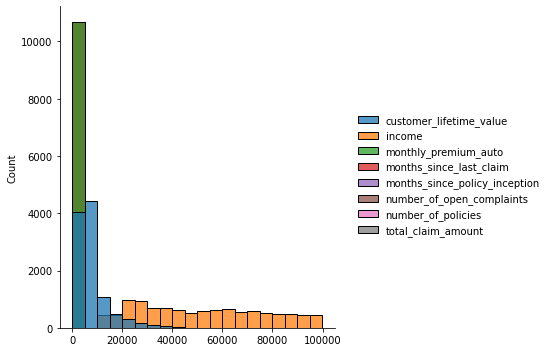

In [82]:
sns.displot(numerical, bins=20)

sns.displot(numerical["customer_lifetime_value"],bins=20)

### Use Matplotlib to construct histograms

(array([8.497e+03, 1.399e+03, 4.800e+02, 1.750e+02, 9.000e+01, 2.500e+01,
        1.400e+01, 5.000e+00, 3.000e+00, 1.000e+00]),
 array([ 1898. , 10040.7, 18183.4, 26326.1, 34468.8, 42611.5, 50754.2,
        58896.9, 67039.6, 75182.3, 83325. ]),
 <BarContainer object of 10 artists>)

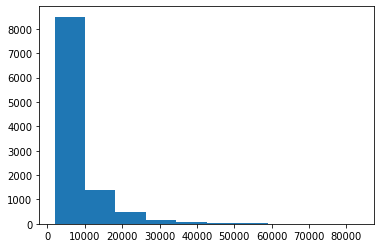

In [83]:
plt.hist(numerical["customer_lifetime_value"])

 ### Do the distributions for different numerical variables look like a normal distribution?

Text(0.5, 1.0, 'Months since last claim')

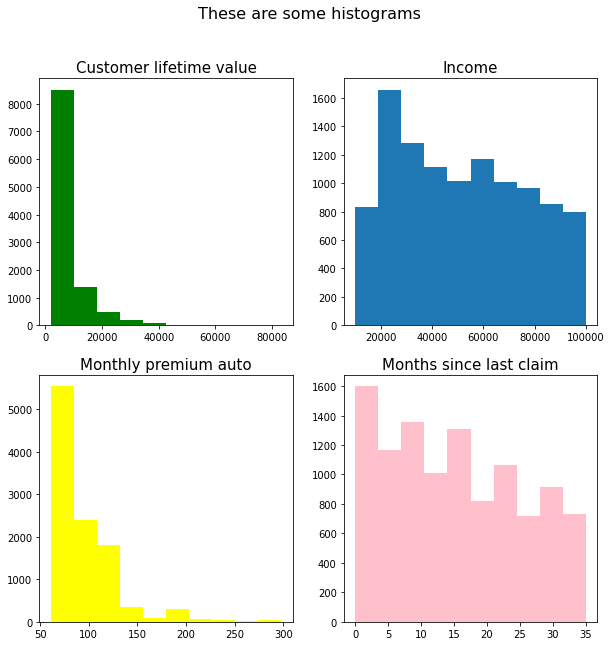

In [84]:
fig, ax = plt.subplots(2,2 ,figsize=(10, 10))
plt.suptitle("These are some histograms", fontsize=16)

ax[0,0].hist(numerical["customer_lifetime_value"], color = "green")
ax[0,0].set_title('Customer lifetime value', fontsize=15)

ax[0,1].hist(numerical["income"])
ax[0,1].set_title('Income', fontsize=15)

ax[1,0].hist(numerical["monthly_premium_auto"],color = "yellow")
ax[1,0].set_title('Monthly premium auto', fontsize=15)

ax[1,1].hist(numerical["months_since_last_claim"],color = "pink")
ax[1,1].set_title('Months since last claim', fontsize=15)


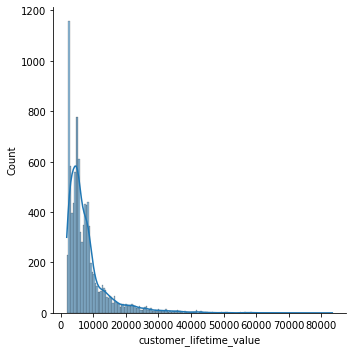

In [85]:
sns.displot(numerical["customer_lifetime_value"],  kde=True)

### Check the multicollinearity of the numerical variables

<AxesSubplot:>

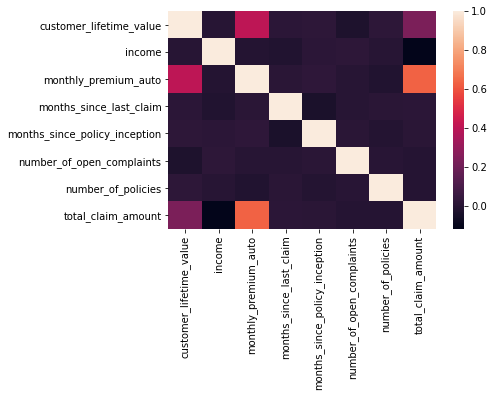

In [86]:
sns.heatmap(numerical.corr())

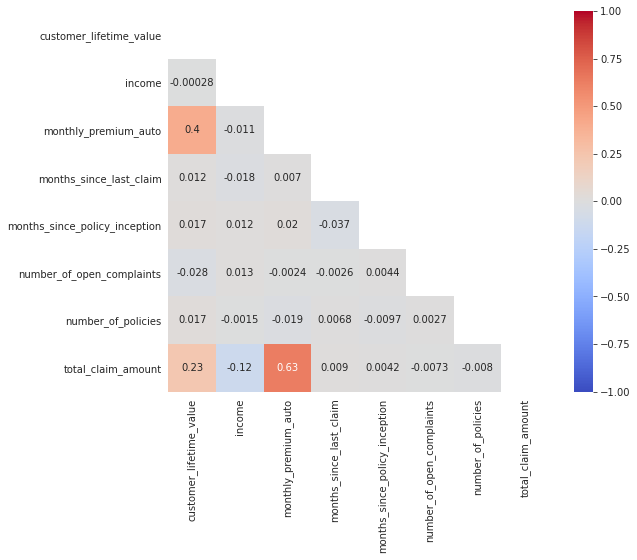

In [87]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

- As we don't have a lot of correlation, I'm going to keep all the features

## Activity 5


### Show a plot of the total number of responses.

In [88]:
df_clean["response"].count()

10689

In [89]:
df_clean["response"].value_counts()

no     9328
yes    1361
Name: response, dtype: int64

- out of 10,689 responses, only 1,361 are yes --> 12,7%

In [90]:
#sns.set_palette("hls", 8)
#palette_alive = {"yes": "C5", "no": "C0"}

- We use countplot to bin categorical

[Text(0.5, 1.0, 'Total number of responses')]

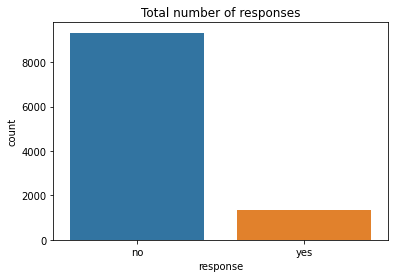

In [91]:
sns.countplot(x="response", data=df_clean).set(title='Total number of responses')

### Show a plot of the response rate by the sales channel.

[Text(0.5, 1.0, 'Sales channel')]

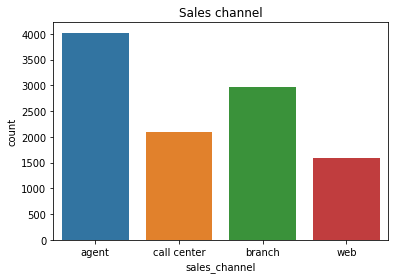

In [92]:
sns.countplot(x="sales_channel", data=df_clean).set(title='Sales channel')

[Text(0.5, 1.0, 'Response rate by the sales channel')]

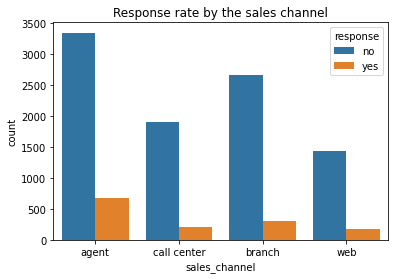

In [93]:
sns.countplot(x="sales_channel",hue="response",data=df_clean).set(title='Response rate by the sales channel')

In [94]:
df_clean.groupby(['sales_channel', 'response']).size().unstack() 

response,no,yes
sales_channel,,
agent,3339,680
branch,2666,309
call center,1895,204
web,1428,168


In [95]:
df_response = df_clean.groupby(['sales_channel', 'response']).size().unstack() 
print("Agent response rate to yes is " + str(round(df_response.loc["agent"][1]/df_response.loc["agent"][0],5)*100) + "%")
print("Branch response rate to yes is " + str(round(df_response.loc["branch"][1]/df_response.loc["branch"][0],5)*100) + "%")
print("Call center response rate to yes is " + str(round(df_response.loc["call center"][1]/df_response.loc["call center"][0],4)*100) + "%")
print("Web response rate to yes is " + str(round(df_response.loc["web"][1]/df_response.loc["web"][0],4)*100) + "%")

Agent response rate to yes is 20.365%
Branch response rate to yes is 11.59%
Call center response rate to yes is 10.77%
Web response rate to yes is 11.76%


### Show a plot of the response rate by the total claim amount.

<AxesSubplot:xlabel='total_claim_amount', ylabel='count'>

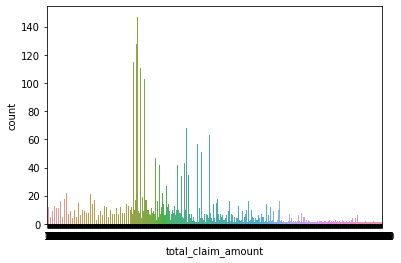

In [96]:
sns.countplot(x="total_claim_amount", data=df_clean)

<AxesSubplot:xlabel='total_claim_amount', ylabel='count'>

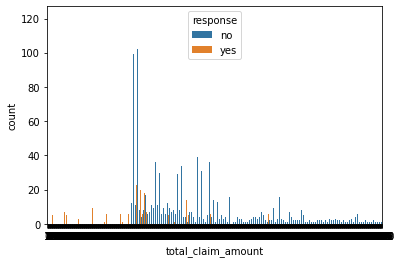

In [97]:
sns.countplot(x="total_claim_amount", hue="response" , data=df_clean)

- As we have a lot of differents total claim amount, it has no sense to make a countplot, but we can bin them.

In [98]:
df_clean["total_claim_amount"].max()

2893

<AxesSubplot:>

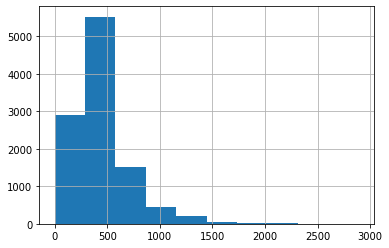

In [99]:
df_clean["total_claim_amount"].hist()

- We are going to define the bins as low, medium, high and very high
- As the distribution is not normal, I will not assign symmetrical values to the bins.
- I am going to define bins and labels and put it inside CUT function.

[Text(0.5, 1.0, 'Response rate by the total claim amount')]

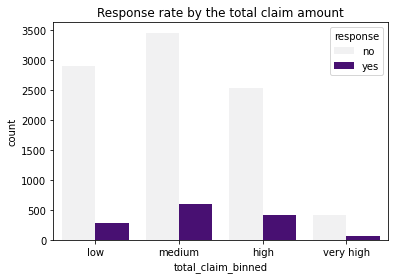

In [100]:
bins = [0, 300, 500, 1000, 3000]
labels = ["low", "medium", "high", "very high"]
df_clean['total_claim_binned'] = pd.cut(df_clean["total_claim_amount"], bins, labels = labels)
sns.countplot(x="total_claim_binned",hue="response",data=df_clean,color = "indigo").set(title='Response rate by the total claim amount')

In [101]:
df_claim = df_clean.groupby(['total_claim_binned', 'response']).size().unstack() 
df_claim

response,no,yes
total_claim_binned,,
low,2909,283
medium,3458,593
high,2539,423
very high,413,62


In [102]:
print("Low response rate to yes is " + str(round(df_claim.loc["low"][1]/df_claim.loc["low"][0],5)*100) + "%")
print("Medium response rate to yes is " + str(round(df_claim.loc["medium"][1]/df_claim.loc["medium"][0],5)*100) + "%")
print("High center response rate to yes is " + str(round(df_claim.loc["high"][1]/df_claim.loc["high"][0],5)*100) + "%")
print("Very high rate to yes is " + str(round(df_claim.loc["very high"][1]/df_claim.loc["very high"][0],5)*100) + "%")

Low response rate to yes is 9.728%
Medium response rate to yes is 17.149%
High center response rate to yes is 16.66%
Very high rate to yes is 15.012%


### Show a plot of the response rate by income

<AxesSubplot:>

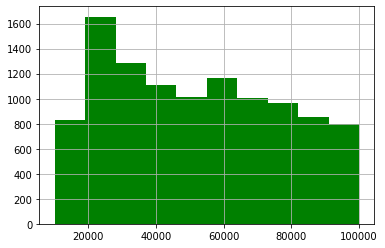

In [103]:
df_clean["income"].hist(color = "green")

In [104]:
df_clean["income"].max()

99981

[Text(0.5, 1.0, 'response rate by the income')]

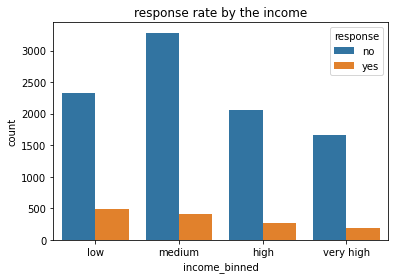

In [105]:
income_bins = [0, 30000, 60000, 80000, 100000]
income_labels = ["low", "medium", "high", "very high"]
df_clean['income_binned'] = pd.cut(df_clean["income"], bins = income_bins, labels = income_labels)
sns.countplot(x="income_binned",hue="response",data=df_clean).set(title="response rate by the income")

In [106]:
df_income = df_clean.groupby(['income_binned', 'response'])
df_income   #it doesn't show nothing because groupby is waiting to do something

In [107]:
df_income = df_clean.groupby(['income_binned', 'response']).size().unstack() 
df_income

response,no,yes
income_binned,,
low,2325,491
medium,3282,415
high,2055,274
very high,1666,181


In [108]:
print("Low income response rate to yes is " + str(round(df_income.loc["low"][1]/df_claim.loc["low"][0],4)*100) + "%")
print("Medium income response rate to yes is " + str(round(df_income.loc["medium"][1]/df_claim.loc["medium"][0],4)*100) + "%")
print("High center income response rate to yes is " + str(round(df_income.loc["high"][1]/df_claim.loc["high"][0],5)*100) + "%")
print("Very high income rate to yes is " + str(round(df_income.loc["very high"][1]/df_claim.loc["very high"][0],5)*100) + "%")

Low income response rate to yes is 16.88%
Medium income response rate to yes is 12.0%
High center income response rate to yes is 10.792%
Very high income rate to yes is 43.826%


### Show a plot of the response rate by employment_status

[Text(0.5, 1.0, 'Response rate by employment status')]

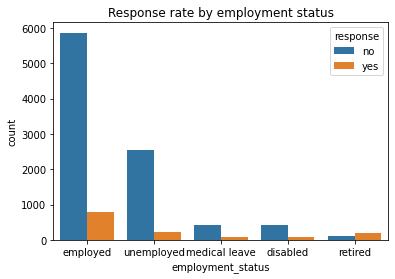

In [109]:
sns.countplot(x="employment_status",hue="response",data=df_clean).set(title="Response rate by employment status")

In [110]:
df_employment = df_clean.groupby(['employment_status', 'response']).size().unstack() 
df_employment

response,no,yes
employment_status,,
disabled,412,77
employed,5861,797
medical leave,412,78
retired,106,195
unemployed,2537,214


In [111]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


#### sns.barplot(x = numerical['customer_lifetime_value'],
            y = numerical['income'], 
            hue = numerical['number_of_policies'])

In [112]:
df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,east,female,master,0.0,50716,1000.0,0.0,personal auto,four-door car,2.704934
1,central,female,bachelor,697953.0,50716,94.0,0.0,personal auto,four-door car,1131.464935
2,nevada,female,bachelor,1288743.0,48767.0,108.0,0.0,personal auto,two-door car,566.472247
3,west region,male,bachelor,764586.0,50716,106.0,0.0,corporate auto,suv,529.881344
4,east,male,high school or below,536307.0,36357.0,68.0,0.0,personal auto,four-door car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,west region,male,bachelor,23405.0,71941.0,73.0,0.0,personal auto,four-door car,198.234764
7066,west region,female,college,3096.0,21604.0,79.0,0.0,corporate auto,four-door car,379.200000
7067,west region,male,bachelor,8163.0,50716,85.0,3.0,corporate auto,four-door car,790.784983
7068,west region,male,college,7524.0,21941.0,96.0,0.0,personal auto,four-door car,691.200000


In [117]:
df.groupby(['gender','education','policy type']).mean()

customer lifetime value  \
gender education            policy type                               
female bachelor             corporate auto            143328.382716   
                            personal auto             206717.997038   
                            special auto              232391.381818   
       bachelors            corporate auto            481672.000000   
                            personal auto             470890.666667   
                            special auto                   0.000000   
       college              corporate auto            213637.688811   
                            personal auto             224383.183350   
                            special auto              188217.714286   
       doctor               corporate auto            179628.709677   
                            personal auto             224132.244275   
                            special auto              261430.333333   
       high school or below corporate auto            151914.024221   
                            personal auto             220722.786902   
                            special auto              286099.230769   
       master               corporate auto            228541.223684   
                            personal auto             218205.642384   
                            special auto               78167.000000   
male   bachelor             corporate auto            157296.431655   
                            personal auto             142106.377419   
                            special auto              137854.607843   
       bachelors            corporate auto            502929.000000   
                            personal auto             522936.111111   
       college              corporate auto            165153.701107   
                            personal auto             159840.525853   
                            special auto              284329.017857   
       doctor               corporate auto            212131.636364   
                            personal auto             151414.081967   
                            special auto               99058.428571   
       high school or below corporate auto            159186.840426   
                            personal auto             167112.427624   
                            special auto              187372.326087   
       master               corporate auto            109520.015152   
                            personal auto             167088.372549   
                            special auto              155645.357143   

                                            monthly premium auto  \
gender education            policy type                            
female bachelor             corporate auto             93.262346   
                            personal auto             101.508391   
                            special auto               94.727273   
       bachelors            corporate auto             69.000000   
                            personal auto             786.666667   
                            special auto               74.000000   
       college              corporate auto            211.513986   
                            personal auto              98.937562   
                            special auto               88.269841   
       doctor               corporate auto             80.387097   
                            personal auto              94.396947   
                            special auto               83.666667   
       high school or below corporate auto             94.622837   
                            personal auto             108.261954   
                            special auto               98.092308   
       master               corporate auto             96.407895   
                            personal auto             139.817881   
                            special auto               79.000000   
male   bachelor             corporate auto             9

In [118]:
df.groupby(['gender','education','policy type'])['total claim amount'].mean()

gender  education             policy type   
female  bachelor              corporate auto    398.580089
                              personal auto     419.084266
                              special auto      429.982378
        bachelors             corporate auto    299.076777
                              personal auto     283.148990
                              special auto      355.200000
        college               corporate auto    376.514062
                              personal auto     391.865382
                              special auto      450.749812
        doctor                corporate auto    248.566990
                              personal auto     346.029960
                              special auto      276.898915
        high school or below  corporate auto    452.621543
                              personal auto     460.516117
                              special auto      509.091801
        master                corporate auto    329.436031
           